# Assignment 4 (60 points - Due on Monday October 25th by 7:00 pm ET)

**You are free to use any IDE you like.**
The output of this assignment for submission should be in PDF format **AND** .py or .ipynb. The name of the file should be as follows: Lastname_Firstname_Assignment4.pdf (example: Thomas_Sunela_Assignment4.pdf) ****AND**** Lastname_Firstname_Assignment4.ipynb (example: Thomas_Sunela_Assignment4.ipynb. In short, you are submitting the python notebook as well as the pdf of that notebook.

Incorrect file name will cost you points! Do NOT submit HTML code file.
Instructions for converting a Jupyter Python notebook to PDF: Go to the menu and choose, File --> Download As --> html

Open that html file and print it to PDF.

**Things to note:**
* Output should be displayed for each question

## Use the NDFootballScore file to answer the following questions. Each question answer should be displayed. The meaning of some of the variables are described below.
* Season = the year the game was played
* Site = Home or Away game
* ND Coach = ND Coach's name
* W/L/T = Win, Loss or Tie


<h3> You may need to recode some variables like W/L/T etc. so that the results are meaningful. Ensure there are sufficient comments in what you are doing.  For example, if there are multiple things asked in one question, separate it out with adequate comments. 

### 1. Load and explore the data. Remove unnecessary columns to only retain "Season, W/L/T, Score, and Opponent". Rename the `W/L/T` column to `result`. Make all the column names lowercase 

In [1]:
# Answer
import pandas as pd
df = pd.read_csv('NDFootballScore.csv')
df

,Season,Site,Month,Day,Year,ND Coach,W/L/T,Score,ND Rank,Opponent,Opp. Coach,Opp. Rank
0,1887,HOME,NOV,23,1887,NO COACH,L,0-8,No Poll,MICHIGAN,NO COACH,No Poll
1,1888,HOME,APR,20,1888,NO COACH,L,6-26,No Poll,MICHIGAN,NO COACH,No Poll
2,1888,HOME,APR,21,1888,NO COACH,L,4-10,No Poll,MICHIGAN,NO COACH,No Poll
3,1888,HOME,DEC,6,1888,NO COACH,W,20-0,No Poll,HARVARD PREP,UNKNOWN,No Poll
4,1889,AWAY,NOV,14,1889,NO COACH,W,9-0,No Poll,NORTHWESTERN,NO COACH,No Poll
...,...,...,...,...,...,...,...,...,...,...,...,...
1257,2016,HOME,NOV,19,2016,KELLY,L,31-34,Not Ranked,VIRGINIA TECH,JUSTIN FUENTE,Not Ranked
1258,2016,AWAY,NOV,26,2016,KELLY,L,27-45,Not Ranked,SOUTHERN CAL,CLAY HELTON,12
1259,2017,HOME,SEP,2,2017,KELLY,W,49-16,Not Ranked,TEMPLE,GEOFF COLLINS,Not Ranked
1260,2017,HOME,SEP,9,2017,KELLY,L,19-20,24,GEORGIA,KIRBY SMART,15


In [2]:
df.head()

,Season,Site,Month,Day,Year,ND Coach,W/L/T,Score,ND Rank,Opponent,Opp. Coach,Opp. Rank
0,1887,HOME,NOV,23,1887,NO COACH,L,0-8,No Poll,MICHIGAN,NO COACH,No Poll
1,1888,HOME,APR,20,1888,NO COACH,L,6-26,No Poll,MICHIGAN,NO COACH,No Poll
2,1888,HOME,APR,21,1888,NO COACH,L,4-10,No Poll,MICHIGAN,NO COACH,No Poll
3,1888,HOME,DEC,6,1888,NO COACH,W,20-0,No Poll,HARVARD PREP,UNKNOWN,No Poll
4,1889,AWAY,NOV,14,1889,NO COACH,W,9-0,No Poll,NORTHWESTERN,NO COACH,No Poll


In [3]:
df.dtypes

Season         int64
Site          object
Month         object
Day            int64
Year           int64
ND Coach      object
W/L/T         object
Score         object
ND Rank       object
Opponent      object
Opp. Coach    object
Opp. Rank     object
dtype: object

In [4]:
df.shape

(1262, 12)

In [5]:
New_df = df.drop(['Site','Month','Day','Year','ND Coach','ND Rank','Opp. Coach','Opp. Rank'], axis = 1)
New_df

,Season,W/L/T,Score,Opponent
0,1887,L,0-8,MICHIGAN
1,1888,L,6-26,MICHIGAN
2,1888,L,4-10,MICHIGAN
3,1888,W,20-0,HARVARD PREP
4,1889,W,9-0,NORTHWESTERN
...,...,...,...,...
1257,2016,L,31-34,VIRGINIA TECH
1258,2016,L,27-45,SOUTHERN CAL
1259,2017,W,49-16,TEMPLE
1260,2017,L,19-20,GEORGIA


In [6]:
New_df.rename(columns={"W/L/T":"result"},inplace=True)
New_df

,Season,result,Score,Opponent
0,1887,L,0-8,MICHIGAN
1,1888,L,6-26,MICHIGAN
2,1888,L,4-10,MICHIGAN
3,1888,W,20-0,HARVARD PREP
4,1889,W,9-0,NORTHWESTERN
...,...,...,...,...
1257,2016,L,31-34,VIRGINIA TECH
1258,2016,L,27-45,SOUTHERN CAL
1259,2017,W,49-16,TEMPLE
1260,2017,L,19-20,GEORGIA


In [7]:
New_df.columns = New_df.columns.str.lower()
New_df

,season,result,score,opponent
0,1887,L,0-8,MICHIGAN
1,1888,L,6-26,MICHIGAN
2,1888,L,4-10,MICHIGAN
3,1888,W,20-0,HARVARD PREP
4,1889,W,9-0,NORTHWESTERN
...,...,...,...,...
1257,2016,L,31-34,VIRGINIA TECH
1258,2016,L,27-45,SOUTHERN CAL
1259,2017,W,49-16,TEMPLE
1260,2017,L,19-20,GEORGIA


### 2. Use Boolean Indexing (Boolean Selection) to calculate ND's all-time winning percentage.  Store the result in the variable **all_time_win_pct**. 
* Using f strings, print: *"Notre Dame Football's all time winning percentage is XX.X%."*



$$\text{all-time winning pct} = \frac{\text{ # of wins}}{\text{# games played} - \text{# of ties}}$$

In [8]:
# Answer
cond1 = New_df['result'] == 'W'
cond2 = New_df['result'] == 'T'
print(f"Notre Dame Football's all time winning percentage is ",round(len(df[cond1])/(len(New_df)-len(df[cond2])),3)*100)

Notre Dame Football's all time winning percentage is  73.5


### 3. What is the Average Margin of Victory
The formula for Avg Margin of Victory is as follows.

avg_mov = (sum(nd_score) - sum(opp_score)) / num_wins

Answer the following questions:

1. For all of the games that Notre Dame won, what was the avg margin of victory?
2. For games played in the 1999 season, what was the avg margin of victory?

Note: This requires you to create two new columns `nd_score` and `opp_score`

In [22]:
def avg_mov(score1,score2,total):
    return round((score1-score2)/total,1)

In [23]:
New_df[['nd_score','opp_score']] = New_df.score.str.split("-",expand=True)

In [24]:
New_df['nd_score'] = pd.to_numeric(New_df['nd_score'])
New_df['opp_score'] = pd.to_numeric(New_df['opp_score'])

In [25]:
New_df.dtypes

season        int64
result       object
score        object
opponent     object
nd_score      int64
opp_score     int64
dtype: object

In [46]:
New_df2=New_df[cond1]
answer = avg_mov(New_df2['nd_score'].sum(),New_df2['opp_score'].sum(),len(New_df2))
print("For all of the games that Notre Dame won, avg margin of victory is",answer)

For all of the games that Notre Dame won, avg margin of victory is 22.5


In [41]:
cond3 = New_df['season'] == 1999
New_df3=New_df[cond3]

In [47]:
answer = avg_mov(New_df3['nd_score'].sum(),New_df3['opp_score'].sum(),len(New_df3[New_df3['result']=="W"]))
print("For games played in the 1999 season, avg margin of victory is",answer)

For games played in the 1999 season, avg margin of victory is 3.4


### 4. Create Plots for the following:

1. Histogram of the nd_score using 100 bins
2. Boxplot for the nd_score and opp_score on the same chart
3. Plot the top 10 teams by the number of games played

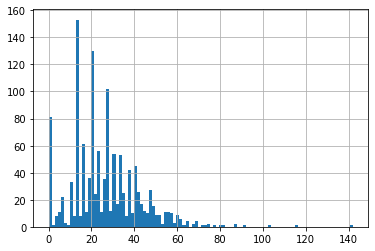

In [48]:
import matplotlib.pyplot as plt
New_df['nd_score'].hist(bins=100)
plt.show()

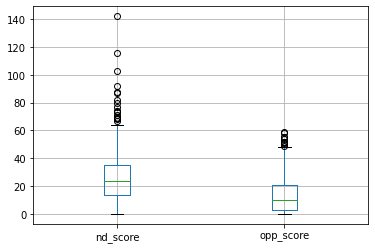

In [50]:
New_df.boxplot(column=['nd_score','opp_score'])
plt.show()

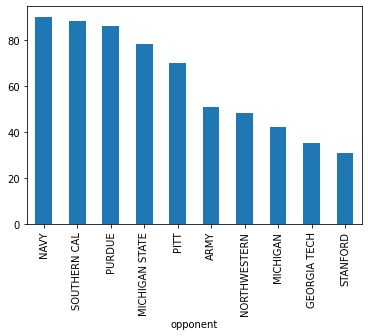

In [58]:
New_df.groupby('opponent')['opponent'].count().sort_values(ascending=False).head(10).plot(kind="bar")
plt.show()